# Exercise 1

In [450]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import sys

%matplotlib inline

## Create Data

In [451]:
names = ['Bob', 'Jessica', 'Mary', 'John', 'Mel']
births = [968, 155, 77, 578, 973]

baby_data_set = list(zip(names, births))
baby_data_set

[('Bob', 968), ('Jessica', 155), ('Mary', 77), ('John', 578), ('Mel', 973)]

### DataFrame

pd.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)

In [452]:
df = DataFrame(data=baby_data_set, columns=['Names', 'Births'])
df

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


In [453]:
df.to_csv('births1880.csv', index=False, header=False)

## Get Data

In [454]:
df = pd.read_csv('births1880.csv', names=['Names', 'Births'])
df

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


## Check Data 

In [455]:
df.dtypes

Names     object
Births     int64
dtype: object

In [456]:
df.Births.dtype

dtype('int64')

## Analyze Data

In [457]:
sorted = df.sort_values(['Births'], ascending=False)
sorted.head(1)

,Names,Births
4,Mel,973


In [458]:
df.Names.values

array(['Bob', 'Jessica', 'Mary', 'John', 'Mel'], dtype=object)

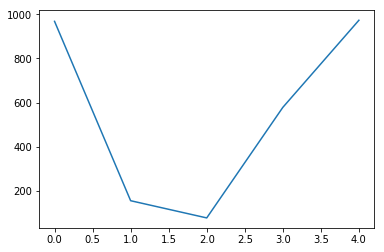

In [459]:
df.Births.plot()

In [460]:
df.Names[df.Births==df.Births.max()].values

array(['Mel'], dtype=object)

# Exercise 2

In [461]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import sys
import random

%matplotlib inline

## Create Data

In [462]:
names = ['Bob','Jessica','Mary','John','Mel']

random.seed(500)
random_names=[names[random.randint(0, len(names)-1)] for i in range(1000)]

random_names[:10]

['John', 'Mel', 'Mel', 'John', 'Mary', 'John', 'Jessica', 'Bob', 'Mary', 'Mel']

In [463]:
random_births = [random.randint(0, 1000) for i in range(1000)]
random_births[:10]

[665, 799, 763, 580, 330, 402, 499, 118, 7, 20]

In [464]:
baby_data_set = list(zip(random_names, random_births))
baby_data_set[:10]

[('John', 665),
 ('Mel', 799),
 ('Mel', 763),
 ('John', 580),
 ('Mary', 330),
 ('John', 402),
 ('Jessica', 499),
 ('Bob', 118),
 ('Mary', 7),
 ('Mel', 20)]

In [465]:
df = pd.DataFrame(data=baby_data_set, columns=['Names', 'Births'])
df[:10]

,Names,Births
0,John,665
1,Mel,799
2,Mel,763
3,John,580
4,Mary,330
5,John,402
6,Jessica,499
7,Bob,118
8,Mary,7
9,Mel,20


In [466]:
df.to_csv('births1880.txt', index=False, header=False)

## Get Data

In [467]:
df = pd.read_csv('births1880.txt', names=['Names', 'Births'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
Names     1000 non-null object
Births    1000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


In [468]:
df.head()

,Names,Births
0,John,665
1,Mel,799
2,Mel,763
3,John,580
4,Mary,330


In [469]:
df.tail()

,Names,Births
995,Jessica,440
996,Mary,579
997,Jessica,522
998,John,233
999,Mel,961


## Check Data

In [470]:
df.Names.unique()

array(['John', 'Mel', 'Mary', 'Jessica', 'Bob'], dtype=object)

In [471]:
df.Names.describe()

count     1000
unique       5
top       Mary
freq       220
Name: Names, dtype: object

In [472]:
name = df.groupby('Names')
df = name.sum() # Another dataframe, and Names automatically becomes index
df # index is Names, see difference of Names and Births in title below

,Births
Names,
Bob,94505
Jessica,98358
John,106004
Mary,101369
Mel,109685


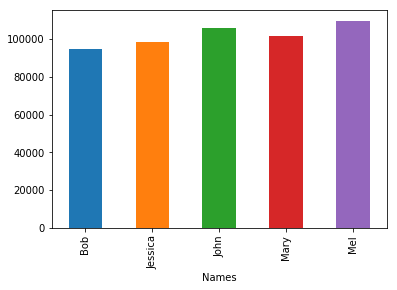

In [473]:
df.Births.plot.bar()

#  Exercise 3

In [474]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
import matplotlib

%matplotlib inline

## Create Data

In [475]:
np.random.seed(111)

rng = pd.date_range(start='1/1/2009', end='12/31/2012', freq='W-MON')


def CreateDataSet(Number=1):
    output = []
    for i in range(Number):
        rng = pd.date_range(start='1/1/2009', end='12/31/2012', freq='W-MON')
        data = np.random.randint(low=25, high=1000, size=len(rng))
        status = [1, 2, 3]
        random_status = [status[np.random.randint(low=0, high=len(status))] for i in range(len(rng))]
        states = ['GA', 'FL', 'fl', 'NY', 'NJ', 'TX']
        random_states = [states[np.random.randint(low=0, high=len(states))] for i in range(len(rng))]

        output.extend(zip(random_states, random_status, data, rng))
    return output


dataset = CreateDataSet(4)
df = pd.DataFrame(data=dataset, columns=['State', 'Status', 'CustomerCount', 'StatusDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 4 columns):
State            836 non-null object
Status           836 non-null int64
CustomerCount    836 non-null int64
StatusDate       836 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 26.2+ KB


In [476]:
df.head()

,State,Status,CustomerCount,StatusDate
0,GA,1,877,2009-01-05
1,FL,1,901,2009-01-12
2,fl,3,749,2009-01-19
3,FL,3,111,2009-01-26
4,GA,1,300,2009-02-02


In [477]:
df.to_excel('Exercise3.xlsx', index=False)

## Get Data

In [478]:
df = pd.read_excel('Exercise3.xlsx', sheet_name=0, index_col='StatusDate')
df.dtypes

State            object
Status            int64
CustomerCount     int64
dtype: object

In [479]:
df.index

DatetimeIndex(['2009-01-05', '2009-01-12', '2009-01-19', '2009-01-26',
               '2009-02-02', '2009-02-09', '2009-02-16', '2009-02-23',
               '2009-03-02', '2009-03-09',
               ...
               '2012-10-29', '2012-11-05', '2012-11-12', '2012-11-19',
               '2012-11-26', '2012-12-03', '2012-12-10', '2012-12-17',
               '2012-12-24', '2012-12-31'],
              dtype='datetime64[ns]', name='StatusDate', length=836, freq=None)

In [480]:
df.head()

,State,Status,CustomerCount
StatusDate,,,
2009-01-05,GA,1,877
2009-01-12,FL,1,901
2009-01-19,fl,3,749
2009-01-26,FL,3,111
2009-02-02,GA,1,300


## Check Data

In [481]:
df.State.unique()

array(['GA', 'FL', 'fl', 'TX', 'NY', 'NJ'], dtype=object)

In [482]:
df['State'] = df.State.apply(lambda x: x.upper())
df.State.unique()

array(['GA', 'FL', 'TX', 'NY', 'NJ'], dtype=object)

In [483]:
mask = df.Status == 1
df = df[mask]

In [484]:
mask = df.State == 'NJ'
df.State[mask] = 'NY'

In [485]:
df.State.unique()

array(['GA', 'FL', 'NY', 'TX'], dtype=object)

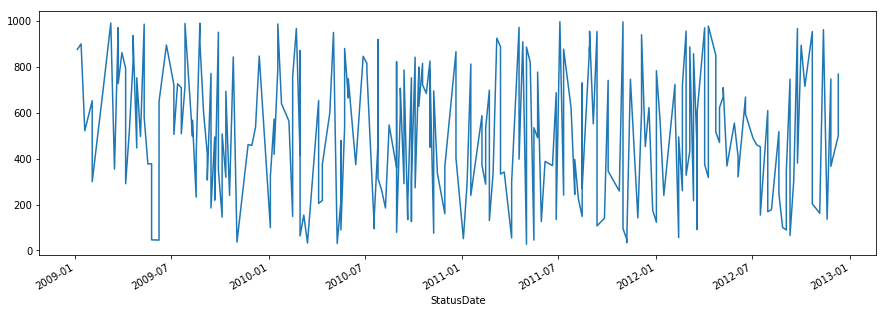

In [486]:
df.CustomerCount.plot(figsize=(15, 5))

In [487]:
sortdf = df[df.State=='NY'].sort_index(axis=0) # sort by index
sortdf.head(10)

,State,Status,CustomerCount
StatusDate,,,
2009-01-19,NY,1,522
2009-02-23,NY,1,710
2009-03-09,NY,1,992
2009-03-16,NY,1,355
2009-03-23,NY,1,728
2009-03-30,NY,1,863
2009-04-13,NY,1,520
2009-04-20,NY,1,820
2009-04-20,NY,1,937


In [488]:
Daily = df.reset_index().groupby(['State', 'StatusDate']).sum() # @1
Daily.head()

Status  CustomerCount
State StatusDate                       
FL    2009-01-12       1            901
      2009-02-02       1            653
      2009-03-23       1            752
      2009-04-06       2           1086
      2009-06-08       1            649

@1: group function only takes columns as inputs, not index. Here StatusDate is index, we use reset_index to reset it.

In [489]:
type(Daily)

pandas.core.frame.DataFrame

In [490]:
del Daily['Status']
Daily.head()

CustomerCount
State StatusDate               
FL    2009-01-12            901
      2009-02-02            653
      2009-03-23            752
      2009-04-06           1086
      2009-06-08            649

In [491]:
Daily.index

MultiIndex(levels=[['FL', 'GA', 'NY', 'TX'], [2009-01-05 00:00:00, 2009-01-12 00:00:00, 2009-01-19 00:00:00, 2009-02-02 00:00:00, 2009-02-23 00:00:00, 2009-03-09 00:00:00, 2009-03-16 00:00:00, 2009-03-23 00:00:00, 2009-03-30 00:00:00, 2009-04-06 00:00:00, 2009-04-13 00:00:00, 2009-04-20 00:00:00, 2009-04-27 00:00:00, 2009-05-04 00:00:00, 2009-05-11 00:00:00, 2009-05-18 00:00:00, 2009-05-25 00:00:00, 2009-06-08 00:00:00, 2009-06-22 00:00:00, 2009-07-06 00:00:00, 2009-07-13 00:00:00, 2009-07-20 00:00:00, 2009-07-27 00:00:00, 2009-08-10 00:00:00, 2009-08-17 00:00:00, 2009-08-24 00:00:00, 2009-08-31 00:00:00, 2009-09-07 00:00:00, 2009-09-14 00:00:00, 2009-09-21 00:00:00, 2009-09-28 00:00:00, 2009-10-05 00:00:00, 2009-10-12 00:00:00, 2009-10-19 00:00:00, 2009-10-26 00:00:00, 2009-11-02 00:00:00, 2009-11-23 00:00:00, 2009-11-30 00:00:00, 2009-12-07 00:00:00, 2009-12-14 00:00:00, 2010-01-04 00:00:00, 2010-01-11 00:00:00, 2010-01-18 00:00:00, 2010-01-25 00:00:00, 2010-02-08 00:00:00, 2010-02-1

In [492]:
Daily.loc['FL'].head()

,CustomerCount
StatusDate,
2009-01-12,901
2009-02-02,653
2009-03-23,752
2009-04-06,1086
2009-06-08,649


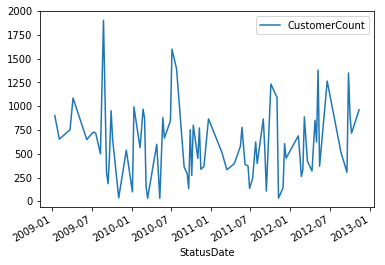

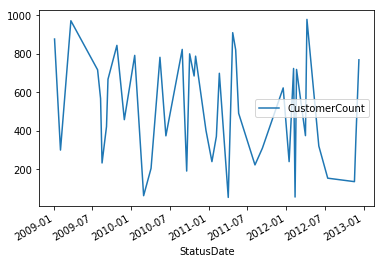

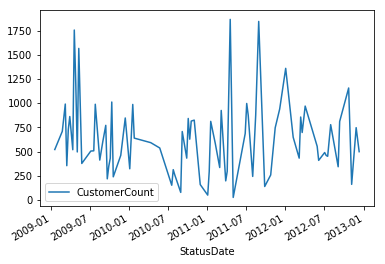

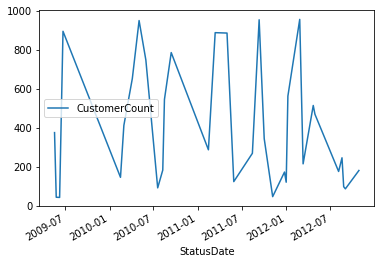

In [493]:
Daily.loc['FL'].plot()
Daily.loc['GA'].plot()
Daily.loc['NY'].plot()
Daily.loc['TX'].plot()

In [494]:
Daily.index.get_level_values(1).year

Int64Index([2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009,
            ...
            2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012],
           dtype='int64', name='StatusDate', length=239)

In [495]:
StateYearMonth = Daily.groupby([Daily.index.get_level_values(0),
               Daily.index.get_level_values(1).year, 
               Daily.index.get_level_values(1).month]) # If confused, see groupby.apply example

StateYearMonth.groups

{('FL',
  2009,
  1): MultiIndex(levels=[['FL', 'GA', 'NY', 'TX'], [2009-01-05 00:00:00, 2009-01-12 00:00:00, 2009-01-19 00:00:00, 2009-02-02 00:00:00, 2009-02-23 00:00:00, 2009-03-09 00:00:00, 2009-03-16 00:00:00, 2009-03-23 00:00:00, 2009-03-30 00:00:00, 2009-04-06 00:00:00, 2009-04-13 00:00:00, 2009-04-20 00:00:00, 2009-04-27 00:00:00, 2009-05-04 00:00:00, 2009-05-11 00:00:00, 2009-05-18 00:00:00, 2009-05-25 00:00:00, 2009-06-08 00:00:00, 2009-06-22 00:00:00, 2009-07-06 00:00:00, 2009-07-13 00:00:00, 2009-07-20 00:00:00, 2009-07-27 00:00:00, 2009-08-10 00:00:00, 2009-08-17 00:00:00, 2009-08-24 00:00:00, 2009-08-31 00:00:00, 2009-09-07 00:00:00, 2009-09-14 00:00:00, 2009-09-21 00:00:00, 2009-09-28 00:00:00, 2009-10-05 00:00:00, 2009-10-12 00:00:00, 2009-10-19 00:00:00, 2009-10-26 00:00:00, 2009-11-02 00:00:00, 2009-11-23 00:00:00, 2009-11-30 00:00:00, 2009-12-07 00:00:00, 2009-12-14 00:00:00, 2010-01-04 00:00:00, 2010-01-11 00:00:00, 2010-01-18 00:00:00, 2010-01-25 00:00:00, 2010-02-

In [496]:
StateYearMonth = Daily.groupby([Daily.index.get_level_values(0), 
                                Daily.index.get_level_values(1).year, 
                                Daily.index.get_level_values(1).month])
Daily['Lower'] = StateYearMonth['CustomerCount'].transform(lambda x: x.quantile(q=.25) 
                                                           - (1.5*x.quantile(q=.75) - x.quantile(q=.25))) # @1
Daily['Upper'] = StateYearMonth['CustomerCount'].transform(lambda x: x.quantile(q=.75) 
                                                           + (1.5*x.quantile(q=.75)-x.quantile(q=.25)))
Daily['Outlier'] = (Daily['CustomerCount'] < Daily['Lower']) | (Daily['CustomerCount'] > Daily['Upper'])
Daily.head()

CustomerCount  Lower   Upper  Outlier
State StatusDate                                       
FL    2009-01-12            901  450.5  1351.5    False
      2009-02-02            653  326.5   979.5    False
      2009-03-23            752  376.0  1128.0    False
      2009-04-06           1086  543.0  1629.0    False
      2009-06-08            649  324.5   973.5    False

@1: Here StateYearMonth is raw where group elements are seperated, so we can use `transform` on all elements. Once we use `sum`, all elements merge to one.

### Compare groupby.transform and groupby.apply

#### groupby.transform

In [522]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar','foo', 'bar'],
                   'B' : ['one', 'one', 'two', 'three','two', 'two'],
                   'C' : [1, 5, 5, 2, 5, 5],
                   'D' : [2.0, 5., 8., 1., 2., 9.]})
df

,A,B,C,D
0,foo,one,1,2.0
1,bar,one,5,5.0
2,foo,two,5,8.0
3,bar,three,2,1.0
4,foo,two,5,2.0
5,bar,two,5,9.0


In [498]:
grouped = df.groupby('A')
grouped.transform(lambda x: (x - x.mean()) / x.std()) # @1

,C,D
0,-1.154701,-0.577350
1,0.577350,0.000000
2,0.577350,1.154701
3,-1.154701,-1.000000
4,0.577350,-0.577350
5,0.577350,1.000000


@1: Call function producing a like-indexed Series on **each group** and return a Series having the same indexes as the original object filled with the transformed values

####  groupby.apply 

In [499]:
ser = pd.Series([0, 1, 2], index='a a b'.split())
ser

a    0
a    1
b    2
dtype: int64

In [500]:
ser.index

Index(['a', 'a', 'b'], dtype='object')

In [501]:
g = ser.groupby(ser.index)
g.apply(lambda x:  x*2 if x.name == 'b' else x/2) # @1

a    0.0
a    0.5
b    4.0
dtype: float64

@1: Apply function ``func``  group-wise and combine the results together.
The function passed to ``apply`` must take a series as its first
argument and return a dataframe, a series or a scalar. ``apply`` will
then take care of combining the results back together into a single
dataframe or series. ``apply`` is therefore a highly flexible
grouping method.

In my opinion, `transform` can get integral property of a group of numbers (such as mean, std, and anything), while `apply` can only do calc on individual number in a group.

### Go Back

In [502]:
ALL = pd.DataFrame(Daily['CustomerCount'].groupby(Daily.index.get_level_values(1)).sum())
ALL.head()

,CustomerCount
StatusDate,
2009-01-05,877
2009-01-12,901
2009-01-19,522
2009-02-02,953
2009-02-23,710


In [503]:
ALL.columns

Index(['CustomerCount'], dtype='object')

In [504]:
YearMonth = ALL.groupby([lambda x:x.year, lambda x:x.month]) # @1
ALL['Max'] = YearMonth['CustomerCount'].transform(lambda x: x.max())
ALL.head()

,CustomerCount,Max
StatusDate,,
2009-01-05,877,901
2009-01-12,901,901
2009-01-19,522,901
2009-02-02,953,953
2009-02-23,710,953


@1: If ``by`` is a function, it's called on **each value of the object's index**

In [505]:
target_data = [1000, 2000, 3000]
idx = pd.date_range(start='12/31/2011', end='12/31/2013', freq='A')
BHAG = pd.DataFrame(target_data, index=idx, columns=['BHAG'])
BHAG

,BHAG
2011-12-31,1000
2012-12-31,2000
2013-12-31,3000


In [506]:
combined = pd.concat([ALL, BHAG], axis=0)
combined = combined.sort_index(axis=0)
combined.tail()

/Users/douyujie1/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,BHAG,CustomerCount,Max
2012-11-19,NaN,136.0,1115.0
2012-11-26,NaN,1115.0,1115.0
2012-12-10,NaN,1269.0,1269.0
2012-12-31,2000.0,NaN,NaN
2013-12-31,3000.0,NaN,NaN


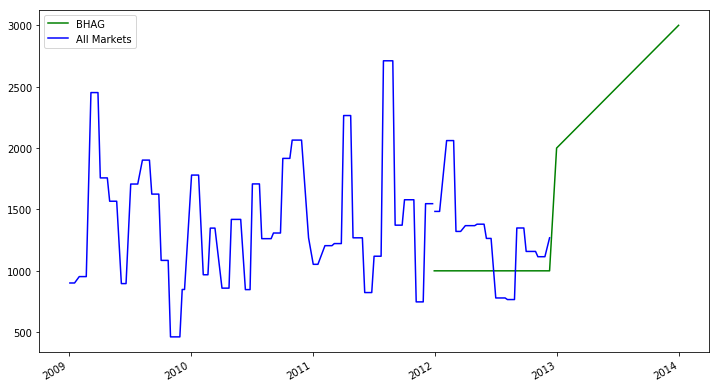

In [507]:
fig, axed = plt.subplots(figsize=(12, 7))
combined['BHAG'].fillna(method='pad').plot(color='green', label='BHAG')
combined['Max'].plot(color='blue', label='All Markets')
plt.legend(loc='best')

In [513]:
Year = combined.groupby(lambda x:x.year).max()
Year

,BHAG,CustomerCount,Max
2009,NaN,2452.0,2452.0
2010,NaN,2065.0,2065.0
2011,1000.0,2711.0,2711.0
2012,2000.0,2061.0,2061.0
2013,3000.0,NaN,NaN


In [514]:
Year['YR_PCT_Change'] = Year['Max'].pct_change(periods=1)
Year

,BHAG,CustomerCount,Max,YR_PCT_Change
2009,NaN,2452.0,2452.0,NaN
2010,NaN,2065.0,2065.0,-0.157830
2011,1000.0,2711.0,2711.0,0.312833
2012,2000.0,2061.0,2061.0,-0.239764
2013,3000.0,NaN,NaN,0.000000


In [517]:
Year.loc[2012, 'Max']

2061.0

In [518]:
Year.loc[2012]['Max']

2061.0

In [519]:
(1+Year.loc[2012, 'YR_PCT_Change']) * Year.loc[2012, 'Max']

1566.8465510881595

Text(0.5, 1.0, 'North East')

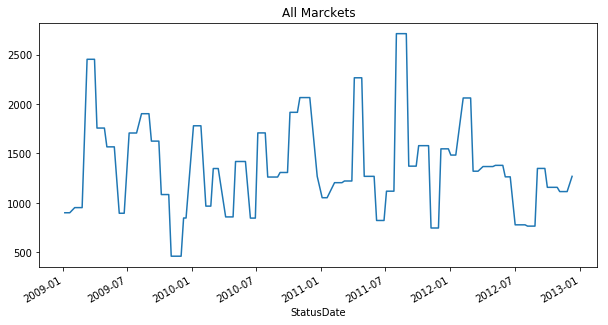

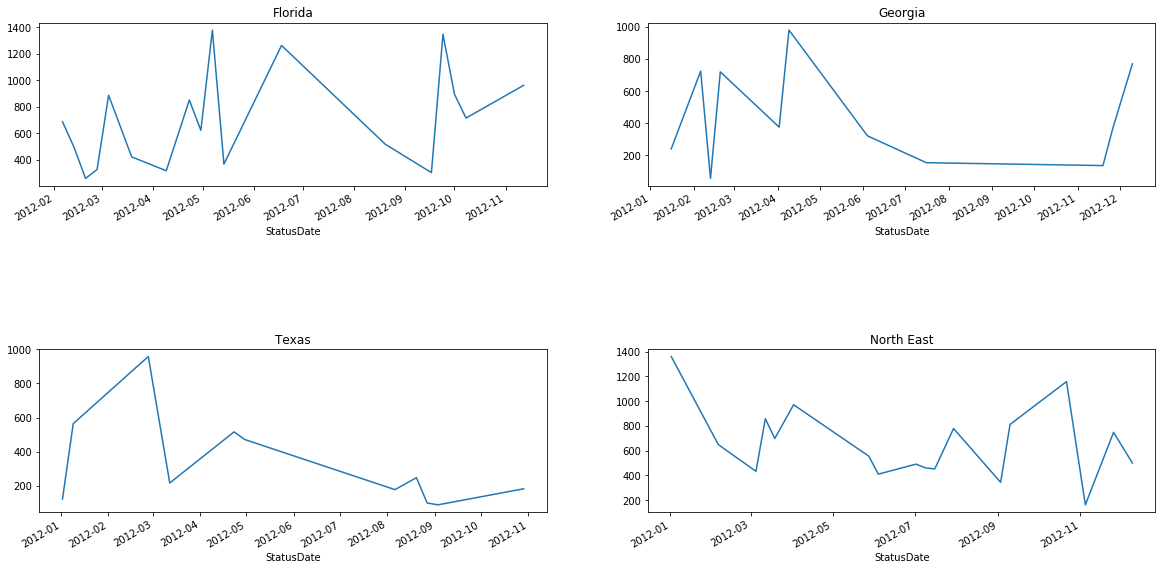

In [520]:
ALL['Max'].plot(figsize=(10, 5))
plt.title('All Marckets')

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
fig.subplots_adjust(hspace=1.0) ## Create space between plots

Daily.loc['FL']['CustomerCount']['2012':].fillna(method='pad').plot(ax=axes[0, 0])
Daily.loc['GA']['CustomerCount']['2012':].fillna(method='pad').plot(ax=axes[0,1]) 
Daily.loc['TX']['CustomerCount']['2012':].fillna(method='pad').plot(ax=axes[1,0]) 
Daily.loc['NY']['CustomerCount']['2012':].fillna(method='pad').plot(ax=axes[1,1]) 

axes[0, 0].set_title('Florida')
axes[0,1].set_title('Georgia')
axes[1,0].set_title('Texas')
axes[1,1].set_title('North East')